### Dataset contains :

- age
- sex
- blood pressure
- smoke
- diabetes
- ejection fraction
- creatinine phosphokinase
- serum_creatinine
- serum_sodium,
- time

#### we have to predict their DEATH EVENT.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


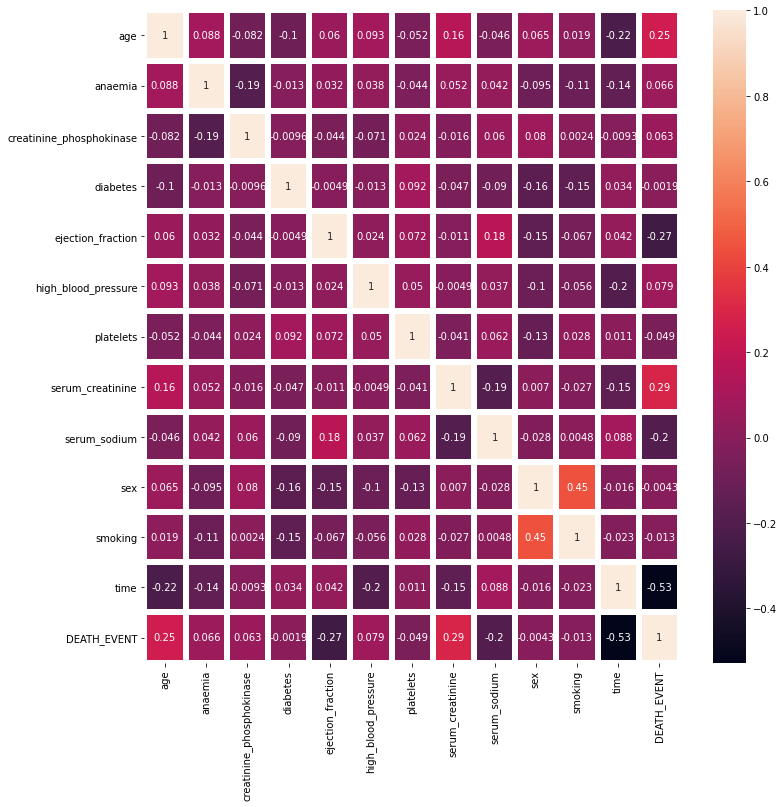

In [5]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot = True, linewidths = 5, ax = ax)
plt.show()

- we see features relationship each other.
- if the relationship how is close and is strong, it can be impact touse them in order to set up true model.

In [11]:
corr = df.corr()
corr_target = abs(corr['DEATH_EVENT'])
relevant_features = corr_target[corr_target > 0.1]
relevant_features

age                  0.253729
ejection_fraction    0.268603
serum_creatinine     0.294278
serum_sodium         0.195204
time                 0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

#### train and test split

In [14]:
X = df.loc[:,{"age","ejection_fraction","serum_creatinine","serum_sodium","time"}]
X

,age,ejection_fraction,serum_creatinine,time,serum_sodium
0,75.0,20,1.9,4,130
1,55.0,38,1.1,6,136
2,65.0,20,1.3,7,129
3,50.0,20,1.9,7,137
4,65.0,20,2.7,8,116
...,...,...,...,...,...
294,62.0,38,1.1,270,143
295,55.0,38,1.2,271,139
296,45.0,60,0.8,278,138
297,45.0,38,1.4,280,140


In [16]:
y = df["DEATH_EVENT"]
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [17]:
X_train, X_test,y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2)

In [20]:
print("X_train shape :",X_train.shape)
print("Y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("Y_test shape :",y_test.shape)

X_train shape : (239, 5)
Y_train shape : (239,)
X_test shape : (60, 5)
Y_test shape : (60,)


## CREATING MODEL

-  Accuracy value is not enough in order to set up actual model. Sometimes, low accuracy value models can predict more actual result than high accuracy value.

In [25]:
accuracy_list = []
algorithm = []
predict_list = []

### Logistic Regression 

test accuracy  0.8166666666666667


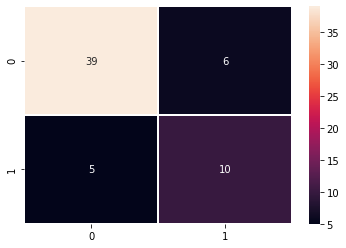

In [26]:
reg = LogisticRegression(max_iter = 1000)
reg.fit(X_train, y_train)
accuracy_list.append(reg.score(X_test, y_test))
algorithm.append("Linear Regression")
print("test accuracy ", reg.score(X_test,y_test))

cm = confusion_matrix(y_test, reg.predict(X_test))
predict_list.append(cm.item(0) + cm.item(2))
sns.heatmap(cm, annot = True, linewidths = .5)
plt.show()

### K Nearest Neighbors

- The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.
- GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In [27]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,25)} # This enables searching over any sequence of parameter settings.
knn_gscv = GridSearchCV(knn, param_grid, cv = 4)  # cv = int, cross-validation generator or an iterable, default=None
knn_gscv.fit(X_train, y_train)
print("Best K Value is  ", knn_gscv.best_params_)

Best K Value is   {'n_neighbors': 6}


In [28]:
accuracy_list.append(knn_gscv.score(X_test, y_test))
print("test accuracy", knn_gscv.score(X_test, y_test))
algorithm.append("K Nearest Neighbors Classifier")

test accuracy 0.8333333333333334


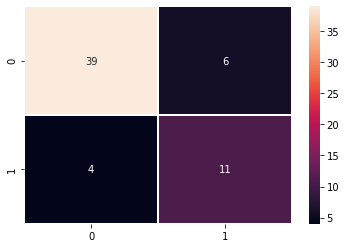

In [29]:
cm = confusion_matrix(y_test, knn_gscv.predict(X_test))
predict_list.append(cm.item(0) + cm.item(2))
sns.heatmap(cm,annot= True, linewidth =.5)
plt.show()

### Support Vector Machine

-  Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in classification objectives.

- The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

test accuracy :  0.8666666666666667


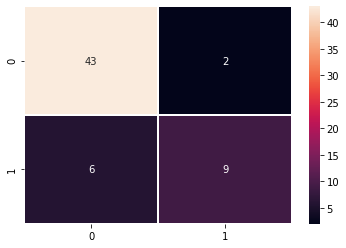

In [31]:
svm = SVC()
svm.fit(X_train, y_train)
print("test accuracy : ", svm.score(X_test, y_test))
accuracy_list.append(svm.score(X_test, y_test))
algorithm.append("Support Vector Machine")

cm = confusion_matrix(y_test, svm.predict(X_test))
predict_list.append(cm.item(0)+cm.item(2))
sns.heatmap(cm, annot = True, linewidths = .5)
plt.show()

### Native Bayes

- Naive Bayes is a machine learning model that is used for large volumes of data, even if you are working with data that has millions of data records the recommended approach is Naive Bayes. It gives very good results when it comes to NLP tasks such as sentimental analysis. It is a fast and uncomplicated classification algorithm.

test accuracy:  0.85


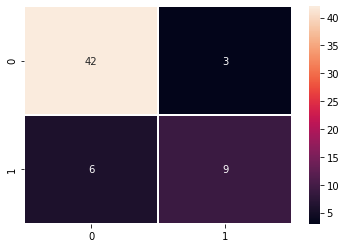

In [32]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("test accuracy: ", nb.score(X_test, y_test)) 
accuracy_list.append(nb.score(X_test, y_test))
algorithm.append("Native Bayes Classifier")

cm = confusion_matrix(y_test, nb.predict(X_test))
predict_list.append(cm.item(0)+cm.item(2))
sns.heatmap(cm, annot = True, linewidths = .5)
plt.show()

### Random Forest

In [33]:
param_grid = {"n_estimators" : np.arange(10,100,10)}
rf = RandomForestClassifier(random_state = 42)
rf_gscv = GridSearchCV(rf, param_grid, cv=4)
rf_gscv.fit(X_train, y_train)
print ("Best K value is", rf_gscv.best_params_)

Best K value is {'n_estimators': 60}


In [36]:
print("test accuracy: ",rf_gscv.score(X_test,y_test))
accuracy_list.append(rf_gscv.score(X_test,y_test))
algorithm.append("Random Forest Classifier")

test accuracy:  0.85


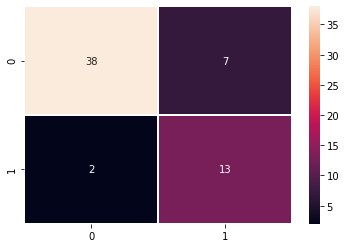

In [38]:
cm = confusion_matrix(y_test,rf_gscv.predict(X_test))
predict_list.append(cm.item(0)+cm.item(2))
sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()

## MODELS 

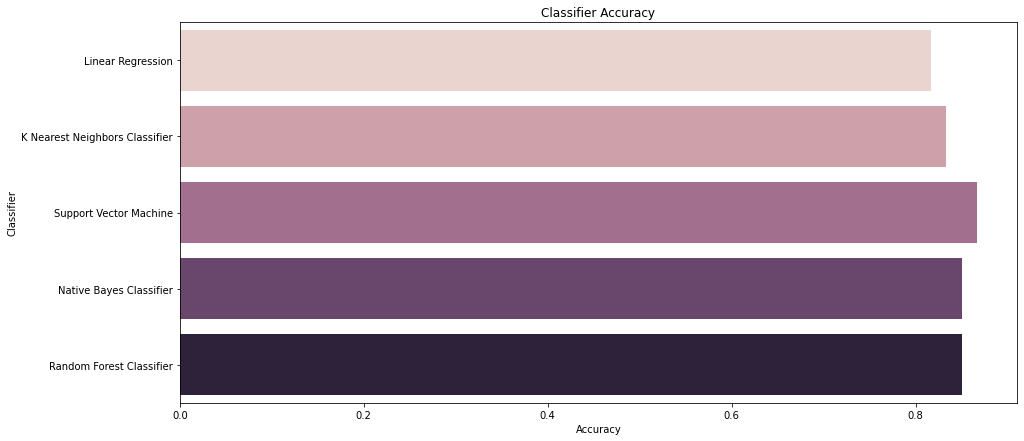

In [39]:
# Classifier Accuracy

f, ax = plt.subplots(figsize = (15,7))
sns.barplot(x = accuracy_list, y = algorithm, palette = sns.cubehelix_palette(len(accuracy_list)))
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.title("Classifier Accuracy")
plt.show()

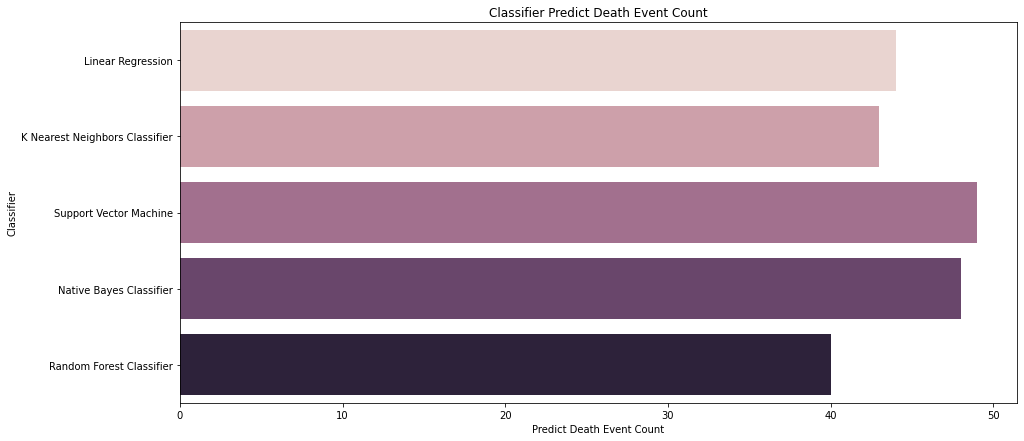

In [40]:
# Classifier Predict Death Event Count

f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x = predict_list, y = algorithm, palette = sns.cubehelix_palette(len(accuracy_list)))
plt.xlabel("Predict Death Event Count")
plt.ylabel("Classifier")
plt.title("Classifier Predict Death Event Count")
plt.show()

# CORRELATION COFFFIENCE IS EFFECTIVE IN CLASSIFICATION PROBLEMS ALSO AS WE CAN SEE, ITS NOT ENOUGH TO LOOK ACCURACY VALUE IN ORDER TO CHOOSE MODEL.  